In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_excel("Ventas.xlsx")
df.head()
df.describe()

,#,FACTURA_ID,COLOR,TALLA,TIPO_DE_PAGO,FORMA_DE_PAGO,NUMERO,NUMERO_FEL,PACIENTE,CANTIDAD,COSTO,COSTO TOTAL,DESCUENTO,TOTAL,UTILIDAD
count,1809.000000,1809.000000,0.0,0.0,1809.0,1809.0,1809.000000,2.290000e+02,0.0,1809.000000,0.0,0.0,1809.000000,1809.000000,1809.000000
mean,905.000000,795473.403538,NaN,NaN,0.0,0.0,666.734660,2.025814e+09,NaN,1.699281,NaN,NaN,32.999320,1038.097927,624.947070
std,522.357636,258902.947704,NaN,NaN,0.0,0.0,302.184254,1.223389e+09,NaN,1.636558,NaN,NaN,182.688594,2498.011707,1713.619317
min,1.000000,60040.000000,NaN,NaN,0.0,0.0,9.000000,1.574618e+07,NaN,1.000000,NaN,NaN,0.000000,0.000000,-599.000000
25%,453.000000,813349.000000,NaN,NaN,0.0,0.0,458.000000,8.808890e+08,NaN,1.000000,NaN,NaN,0.000000,7.000000,5.000000
50%,905.000000,909979.000000,NaN,NaN,0.0,0.0,698.000000,1.993623e+09,NaN,1.000000,NaN,NaN,0.000000,28.000000,20.000000
75%,1357.000000,950865.000000,NaN,NaN,0.0,0.0,910.000000,3.004122e+09,NaN,2.000000,NaN,NaN,0.000000,375.000000,168.000000
max,1809.000000,987170.000000,NaN,NaN,0.0,0.0,1160.000000,4.238100e+09,NaN,15.000000,NaN,NaN,2650.000000,33000.000000,33000.000000


In [5]:
df.isnull().sum()        # Conteo de nulos por columna
df.duplicated().sum()    # Conteo de duplicados

0

C:\Users\ckicu\AppData\Local\Temp\ipykernel_3728\1332300350.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA'] = pd.to_datetime(df['FECHA'])


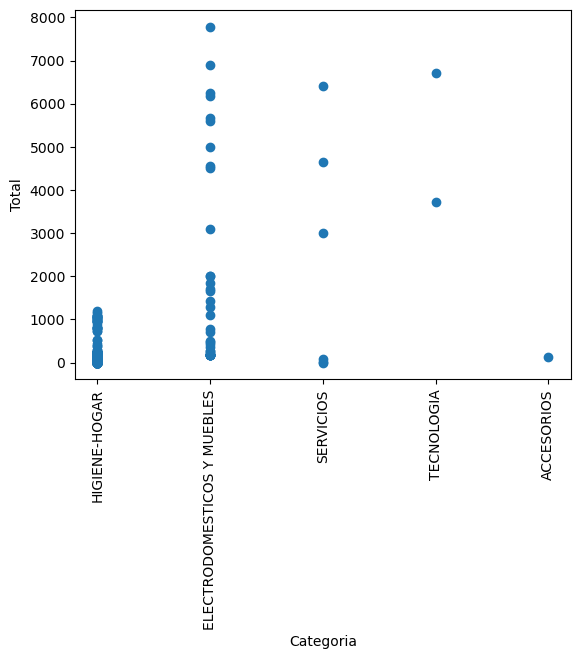

In [6]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df = df[df["FECHA"].dt.year == 2025]
plt.scatter(df["CATEGORIA"], df["TOTAL"])
plt.xlabel("Categoria")
plt.ylabel("Total")
plt.xticks(rotation=90)
plt.show()

In [7]:
#Transformar a fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
print(df['FECHA'].head())

0   2025-05-15
1   2025-05-14
2   2025-05-14
3   2025-05-14
4   2025-05-14
Name: FECHA, dtype: datetime64[ns]


In [8]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)

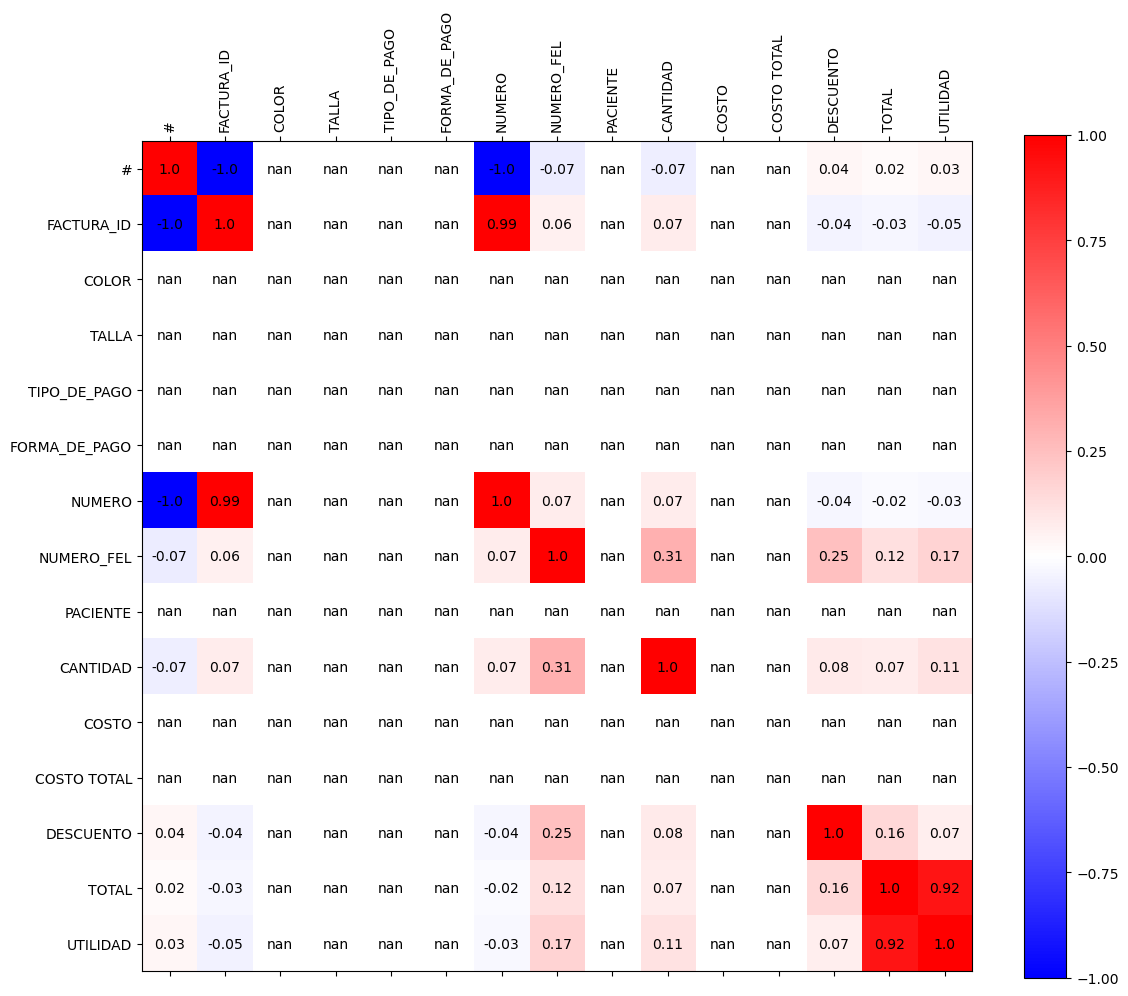

In [9]:
correlaciones = df.select_dtypes(include='number')
matriz = correlaciones.corr()

fig, ax = plt.subplots(figsize=(12, 10))  # Control total del tamaño
cax = ax.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)

# Etiquetas en los ejes
ax.set_xticks(range(len(correlaciones.columns)))
ax.set_yticks(range(len(correlaciones.columns)))
ax.set_xticklabels(correlaciones.columns, rotation=90)
ax.set_yticklabels(correlaciones.columns)

# Anotaciones numéricas
for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        ax.text(i, j, round(matriz.iloc[i, j], 2), ha="center", va="center")

# Barra de color
fig.colorbar(cax)
plt.tight_layout()
plt.show()
